# Adam's Notebook

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as stats
import pandas as pd
from pandas.plotting import parallel_coordinates

In [26]:
# Part 1: Data Sets
rng = np.random.default_rng(42)
n = 100
normal_data = rng.normal(loc=10, scale=2, size=n)
uniform_data = rng.uniform(low=4, high=16, size=n)

sorted_norm = np.sort(normal_data)
sorted_unif = np.sort(uniform_data)

quantiles = [0.10, 0.25, 0.50, 0.75]
normal_quantiles = np.quantile(sorted_norm, quantiles)
uniform_quantiles = np.quantile(sorted_unif, quantiles)
quantile_labels = ['10% Quantile', '25% Quantile', '50% Quantile', '75% Quantile']
colors = ['red', 'orange', 'green', 'blue']


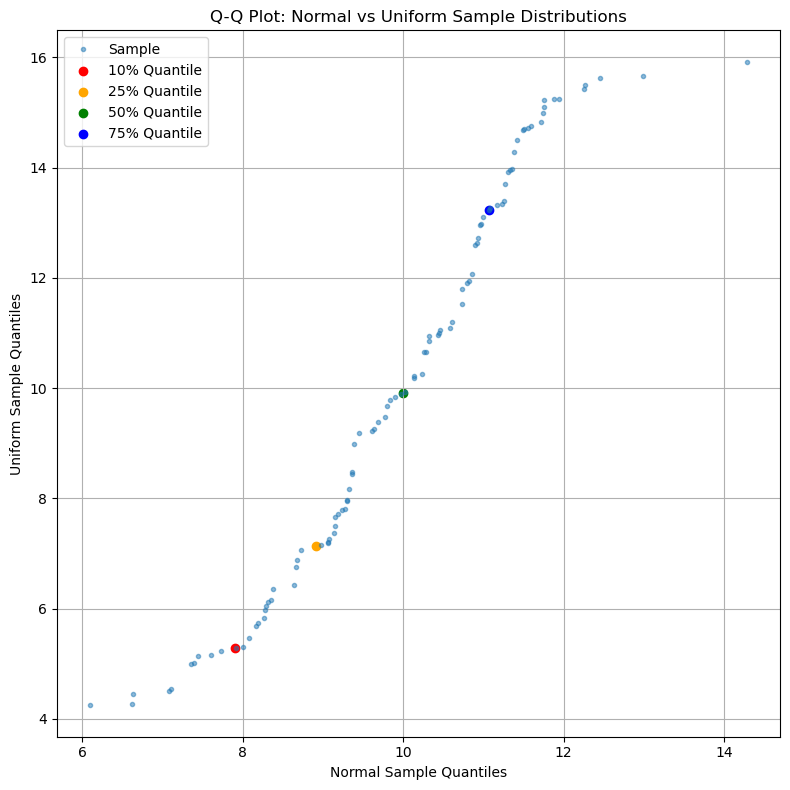

In [27]:
plt.figure(figsize=(8, 8))
plt.plot(sorted_norm, sorted_unif, 'o', ms=3, alpha=0.5, label="Sample")
for i in range(len(quantiles)):
    plt.scatter(normal_quantiles[i], uniform_quantiles[i], c=colors[i], label=quantile_labels[i])
plt.xlabel("Normal Sample Quantiles")
plt.ylabel("Uniform Sample Quantiles")
plt.title("Q-Q Plot: Normal vs Uniform Sample Distributions")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

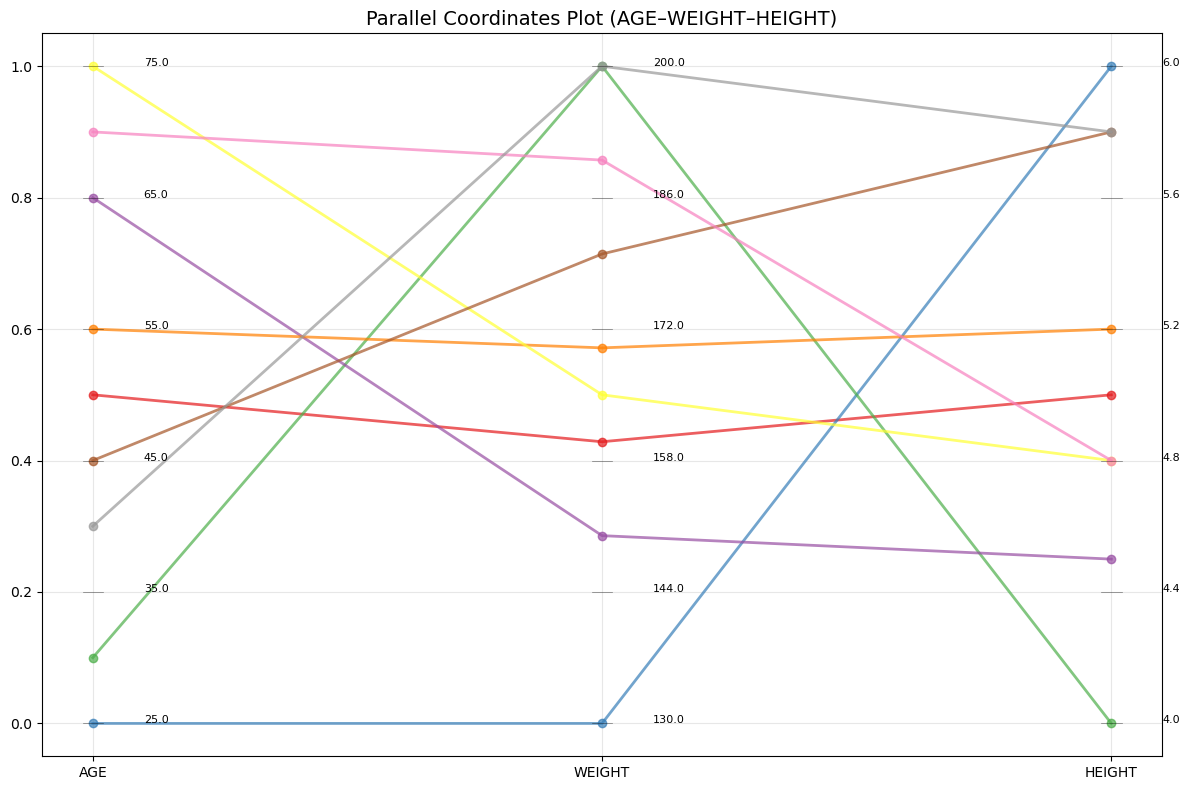

In [28]:
df = pd.DataFrame({
    "AGE":[50,25,30,65,55,75,45,70,40],
    "WEIGHT":[160,130,200,150,170,165,180,190,200],
    "HEIGHT":[5.0,6.0,4.0,4.5,5.2,4.8,5.8,4.8,5.8]
})

df['Person'] = [f'Person {i+1}' for i in range(len(df))]

# Create custom parallel coordinates plot
fig, ax = plt.subplots(figsize=(12, 8))

attributes = ['AGE', 'WEIGHT', 'HEIGHT']
n_attrs = len(attributes)

# Normalize data for plotting (scale each attribute to 0-1)
normalized_data = df[attributes].copy()
for attr in attributes:
    min_val = df[attr].min()
    max_val = df[attr].max()
    normalized_data[attr] = (df[attr] - min_val) / (max_val - min_val)

# Plot lines for each person
colors_list = plt.cm.Set1(np.linspace(0, 1, len(df)))
for i, (idx, row) in enumerate(df.iterrows()):
    values = [normalized_data.loc[idx, attr] for attr in attributes]
    ax.plot(range(n_attrs), values, 'o-', alpha=0.7, 
            color=colors_list[i], label=f'Person {i+1}', linewidth=2)

# Set up axes
ax.set_xlim(-0.1, n_attrs - 0.9)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(range(n_attrs))
ax.set_xticklabels(attributes)

# Add scaled y-axis labels for each attribute
for i, attr in enumerate(attributes):
    min_val = df[attr].min()
    max_val = df[attr].max()
    
    # Create tick positions and labels
    tick_positions = np.linspace(0, 1, 6)  # 6 ticks from min to max
    tick_labels = np.linspace(min_val, max_val, 6)
    
    # Add secondary y-axis for each attribute
    for j, (pos, label) in enumerate(zip(tick_positions, tick_labels)):
        ax.text(i + 0.1, pos, f'{label:.1f}', fontsize=8, ha='left')
        ax.plot([i-0.02, i+0.02], [pos, pos], 'k-', alpha=0.5, linewidth=0.5)

ax.set_title('Parallel Coordinates Plot (AGE–WEIGHT–HEIGHT)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()